In [1]:
# Dependencies
import os
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from WeatherAPI import api_key

# Incorporated citipy to determine city based on latitude and longtitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join(".", "output_data", "cities.csv")

# Rnage of latitudes and longtitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate City List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in tqdm(lat_lngs):
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
if len(cities) >= 500:
    print("We are good")
else:
    print("We need more data")

1500it [00:01, 1399.37it/s]

We are good


# Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="

In [4]:
# Create empty lists to store data
city_name = []
country = []
latitude = []
longtitude = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
n = 0

# Get relevant data for each city; use tqdm to track the progress
for city in tqdm(cities):
    url = base_url + city
    
    # to handle the unavailable data
    try:
        weather_data = requests.get(url).json()
        city_name.append(weather_data["name"])
        country.append(weather_data["sys"]["country"])
        latitude.append(weather_data["coord"]["lat"])
        longtitude.append(weather_data["coord"]["lon"])
        temp.append(weather_data["main"]["temp"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        wind_speed.append(weather_data["wind"]["speed"])
        n = n + 1
        print(f"city number: {n}, city name: {weather_data['name']}")

    except:
        pass
    
# Confirm we have sufficient data
if len(latitude) >= 500:
    print("We are good")
else:
    print("We need more data")

  0%|          | 1/628 [00:00<03:01,  3.45it/s]

city number: 1, city name: Bambanglipuro


  0%|          | 3/628 [00:00<02:21,  4.41it/s]

city number: 2, city name: Plettenberg Bay
city number: 3, city name: Fairbanks


  1%|          | 4/628 [00:00<02:10,  4.79it/s]

city number: 4, city name: Hobart


  1%|          | 5/628 [00:01<02:14,  4.64it/s]

city number: 5, city name: Te Anau


  1%|          | 6/628 [00:01<02:13,  4.65it/s]

city number: 6, city name: Lasa


  1%|          | 7/628 [00:01<02:14,  4.61it/s]

city number: 7, city name: Albany


  1%|▏         | 8/628 [00:01<02:14,  4.59it/s]

city number: 8, city name: Ust-Tarka


  2%|▏         | 10/628 [00:02<02:10,  4.73it/s]

city number: 9, city name: Puerto Colombia
city number: 10, city name: Trogir


  2%|▏         | 11/628 [00:02<02:10,  4.72it/s]

city number: 11, city name: Hermanus


  2%|▏         | 13/628 [00:02<02:07,  4.83it/s]

city number: 12, city name: Grand Gaube
city number: 13, city name: Lompoc


  2%|▏         | 14/628 [00:02<02:07,  4.81it/s]

city number: 14, city name: Ushuaia


  2%|▏         | 15/628 [00:03<02:07,  4.80it/s]

city number: 15, city name: Mataura


  3%|▎         | 16/628 [00:03<02:09,  4.74it/s]

city number: 16, city name: Tahoua


  3%|▎         | 17/628 [00:03<02:09,  4.73it/s]

city number: 17, city name: Bilibino


  3%|▎         | 18/628 [00:03<02:09,  4.70it/s]

city number: 18, city name: Rikitea


  3%|▎         | 19/628 [00:04<02:13,  4.57it/s]

city number: 19, city name: Bluff


  3%|▎         | 20/628 [00:04<02:14,  4.53it/s]

city number: 20, city name: Gat


  3%|▎         | 21/628 [00:04<02:14,  4.53it/s]

city number: 21, city name: Ikast


  4%|▎         | 23/628 [00:05<02:11,  4.59it/s]

city number: 22, city name: Busselton
city number: 23, city name: Cape Town


  4%|▍         | 25/628 [00:05<02:09,  4.64it/s]

city number: 24, city name: Mar del Plata
city number: 25, city name: Dakar


  4%|▍         | 26/628 [00:05<02:10,  4.63it/s]

city number: 26, city name: Guerrero Negro


  4%|▍         | 27/628 [00:06<02:17,  4.37it/s]

city number: 27, city name: La Union


  4%|▍         | 28/628 [00:06<02:17,  4.37it/s]

city number: 28, city name: Port Elizabeth


  5%|▍         | 29/628 [00:06<02:17,  4.35it/s]

city number: 29, city name: Kruisfontein


  5%|▍         | 30/628 [00:06<02:17,  4.36it/s]

city number: 30, city name: Ponta do Sol


  5%|▍         | 31/628 [00:07<02:16,  4.37it/s]

city number: 31, city name: Vaini


  5%|▌         | 33/628 [00:07<02:14,  4.44it/s]

city number: 32, city name: Tiksi


  5%|▌         | 34/628 [00:07<02:13,  4.44it/s]

city number: 33, city name: Ribeira Grande


  6%|▌         | 35/628 [00:07<02:13,  4.44it/s]

city number: 34, city name: Tasiilaq


  6%|▌         | 37/628 [00:08<02:12,  4.46it/s]

city number: 35, city name: Lata
city number: 36, city name: Rome


  6%|▌         | 38/628 [00:08<02:12,  4.46it/s]

city number: 37, city name: Saint-Philippe


  6%|▌         | 39/628 [00:08<02:11,  4.47it/s]

city number: 38, city name: Kokoda


  6%|▋         | 40/628 [00:08<02:11,  4.48it/s]

city number: 39, city name: Ishigaki


  7%|▋         | 41/628 [00:09<02:11,  4.46it/s]

city number: 40, city name: Kapaa


  7%|▋         | 42/628 [00:09<02:11,  4.46it/s]

city number: 41, city name: Raudeberg


  7%|▋         | 43/628 [00:09<02:11,  4.46it/s]

city number: 42, city name: Kieta


  7%|▋         | 45/628 [00:09<02:09,  4.52it/s]

city number: 43, city name: Valle de Allende


  7%|▋         | 46/628 [00:10<02:09,  4.50it/s]

city number: 44, city name: Muros


  7%|▋         | 47/628 [00:10<02:09,  4.50it/s]

city number: 45, city name: Dourbali


  8%|▊         | 49/628 [00:10<02:08,  4.51it/s]

city number: 46, city name: Cabo San Lucas


  8%|▊         | 50/628 [00:11<02:09,  4.47it/s]

city number: 47, city name: Butaritari


  8%|▊         | 51/628 [00:11<02:09,  4.47it/s]

city number: 48, city name: Iqaluit


  8%|▊         | 52/628 [00:11<02:08,  4.47it/s]

city number: 49, city name: Cherskiy


  8%|▊         | 53/628 [00:11<02:09,  4.46it/s]

city number: 50, city name: Padang


  9%|▉         | 55/628 [00:12<02:08,  4.47it/s]

city number: 51, city name: Manta


  9%|▉         | 56/628 [00:12<02:08,  4.47it/s]

city number: 52, city name: Arraial do Cabo


  9%|▉         | 57/628 [00:12<02:07,  4.47it/s]

city number: 53, city name: Cucuta


  9%|▉         | 58/628 [00:12<02:07,  4.47it/s]

city number: 54, city name: Atuona


 10%|▉         | 60/628 [00:13<02:06,  4.50it/s]

city number: 55, city name: Partizansk


 10%|▉         | 61/628 [00:13<02:06,  4.50it/s]

city number: 56, city name: Srikakulam


 10%|▉         | 62/628 [00:13<02:05,  4.50it/s]

city number: 57, city name: Nanortalik


 10%|█         | 63/628 [00:14<02:05,  4.50it/s]

city number: 58, city name: Grindavik


 10%|█         | 64/628 [00:14<02:05,  4.49it/s]

city number: 59, city name: Teya


 10%|█         | 65/628 [00:14<02:05,  4.49it/s]

city number: 60, city name: Bredasdorp


 11%|█         | 67/628 [00:14<02:03,  4.53it/s]

city number: 61, city name: Marzuq
city number: 62, city name: Hilo


 11%|█         | 69/628 [00:15<02:02,  4.55it/s]

city number: 63, city name: Port-Cartier


 11%|█▏        | 71/628 [00:15<02:05,  4.45it/s]

city number: 64, city name: Bethel


 11%|█▏        | 72/628 [00:16<02:04,  4.46it/s]

city number: 65, city name: Karratha


 12%|█▏        | 73/628 [00:16<02:04,  4.45it/s]

city number: 66, city name: Tongzi


 12%|█▏        | 74/628 [00:16<02:04,  4.46it/s]

city number: 67, city name: Sept-Iles


 12%|█▏        | 75/628 [00:16<02:04,  4.45it/s]

city number: 68, city name: Punta Arenas


 12%|█▏        | 77/628 [00:17<02:03,  4.47it/s]

city number: 69, city name: Tarauaca


 13%|█▎        | 79/628 [00:17<02:01,  4.52it/s]

city number: 70, city name: Faanui


 13%|█▎        | 80/628 [00:17<02:00,  4.53it/s]

city number: 71, city name: Thompson


 13%|█▎        | 81/628 [00:17<02:00,  4.53it/s]

city number: 72, city name: Esperance


 13%|█▎        | 82/628 [00:18<02:00,  4.53it/s]

city number: 73, city name: Bosaso


 13%|█▎        | 84/628 [00:18<01:59,  4.56it/s]

city number: 74, city name: Port Alfred
city number: 75, city name: Kahului


 14%|█▎        | 86/628 [00:18<01:58,  4.58it/s]

city number: 76, city name: Yellowknife
city number: 77, city name: Alpena


 14%|█▍        | 88/628 [00:19<01:57,  4.59it/s]

city number: 78, city name: Sinnamary
city number: 79, city name: Touros


 14%|█▍        | 89/628 [00:19<01:57,  4.59it/s]

city number: 80, city name: Vila Franca do Campo


 14%|█▍        | 90/628 [00:19<01:57,  4.59it/s]

city number: 81, city name: Petropavlovsk-Kamchatskiy


 14%|█▍        | 91/628 [00:19<01:57,  4.59it/s]

city number: 82, city name: Itarema


 15%|█▍        | 92/628 [00:20<01:57,  4.56it/s]

city number: 83, city name: Souillac


 15%|█▍        | 93/628 [00:20<01:57,  4.55it/s]

city number: 84, city name: Tateyama


 15%|█▍        | 94/628 [00:20<01:57,  4.54it/s]

city number: 85, city name: Alyangula


 15%|█▌        | 95/628 [00:21<01:57,  4.52it/s]

city number: 86, city name: Saint George


 15%|█▌        | 97/628 [00:21<01:56,  4.54it/s]

city number: 87, city name: Lamu
city number: 88, city name: Xichang


 16%|█▌        | 98/628 [00:21<01:56,  4.54it/s]

city number: 89, city name: Bambous Virieux


 16%|█▌        | 99/628 [00:21<01:56,  4.54it/s]

city number: 90, city name: Aitape


 16%|█▌        | 100/628 [00:22<01:56,  4.54it/s]

city number: 91, city name: Morondava


 16%|█▌        | 102/628 [00:22<01:55,  4.55it/s]

city number: 92, city name: Usinsk


 16%|█▋        | 103/628 [00:22<01:55,  4.55it/s]

city number: 93, city name: Ixtapa


 17%|█▋        | 104/628 [00:22<01:55,  4.55it/s]

city number: 94, city name: Lebu


 17%|█▋        | 105/628 [00:23<01:55,  4.55it/s]

city number: 95, city name: Jerusalen


 17%|█▋        | 107/628 [00:23<01:54,  4.56it/s]

city number: 96, city name: Caraquet


 17%|█▋        | 108/628 [00:23<01:53,  4.56it/s]

city number: 97, city name: Geraldton


 17%|█▋        | 109/628 [00:23<01:53,  4.56it/s]

city number: 98, city name: Berdigestyakh


 18%|█▊        | 111/628 [00:24<01:52,  4.58it/s]

city number: 99, city name: Tigzirt


 18%|█▊        | 112/628 [00:24<01:52,  4.58it/s]

city number: 100, city name: Mayumba


 18%|█▊        | 113/628 [00:24<01:52,  4.57it/s]

city number: 101, city name: Kjopsvik


 18%|█▊        | 115/628 [00:25<01:51,  4.59it/s]

city number: 102, city name: Umm Lajj


 18%|█▊        | 116/628 [00:25<01:51,  4.58it/s]

city number: 103, city name: Puerto Ayora


 19%|█▊        | 117/628 [00:25<01:51,  4.57it/s]

city number: 104, city name: Qaanaaq


 19%|█▉        | 118/628 [00:25<01:51,  4.56it/s]

city number: 105, city name: Koeru


 19%|█▉        | 119/628 [00:26<01:51,  4.57it/s]

city number: 106, city name: Khurba


 19%|█▉        | 120/628 [00:26<01:51,  4.57it/s]

city number: 107, city name: Lixourion


 19%|█▉        | 121/628 [00:26<01:51,  4.56it/s]

city number: 108, city name: Dikson


 20%|█▉        | 123/628 [00:26<01:50,  4.57it/s]

city number: 109, city name: Rocha


 20%|█▉        | 124/628 [00:27<01:50,  4.57it/s]

city number: 110, city name: Ballina


 20%|█▉        | 125/628 [00:27<01:50,  4.57it/s]

city number: 111, city name: Tuatapere


 20%|██        | 126/628 [00:28<01:53,  4.44it/s]

city number: 112, city name: San Pedro


 20%|██        | 127/628 [00:28<01:52,  4.44it/s]

city number: 113, city name: Sao Joao da Barra


 20%|██        | 128/628 [00:28<01:52,  4.44it/s]

city number: 114, city name: Camocim


 21%|██        | 129/628 [00:29<01:52,  4.43it/s]

city number: 115, city name: Freeport


 21%|██        | 130/628 [00:29<01:52,  4.43it/s]

city number: 116, city name: Dicabisagan


 21%|██        | 131/628 [00:29<01:52,  4.43it/s]

city number: 117, city name: Faya


 21%|██        | 132/628 [00:29<01:51,  4.43it/s]

city number: 118, city name: Vila do Maio


 21%|██        | 133/628 [00:30<01:52,  4.40it/s]

city number: 119, city name: Georgetown


 21%|██▏       | 135/628 [00:30<01:52,  4.40it/s]

city number: 120, city name: Greenfield


 22%|██▏       | 137/628 [00:31<01:51,  4.41it/s]

city number: 121, city name: Khatanga


 22%|██▏       | 138/628 [00:31<01:51,  4.41it/s]

city number: 122, city name: Upernavik


 22%|██▏       | 139/628 [00:32<01:53,  4.30it/s]

city number: 123, city name: Boa Vista


 22%|██▏       | 140/628 [00:32<01:53,  4.30it/s]

city number: 124, city name: La Ligua


 23%|██▎       | 142/628 [00:33<01:53,  4.30it/s]

city number: 125, city name: Palmer


 23%|██▎       | 143/628 [00:33<01:52,  4.30it/s]

city number: 126, city name: Ambon


 23%|██▎       | 145/628 [00:33<01:51,  4.32it/s]

city number: 127, city name: Nioro


 23%|██▎       | 146/628 [00:33<01:51,  4.32it/s]

city number: 128, city name: Katsuura


 23%|██▎       | 147/628 [00:34<01:51,  4.32it/s]

city number: 129, city name: Saskylakh


 24%|██▎       | 148/628 [00:34<01:51,  4.32it/s]

city number: 130, city name: Port Lincoln


 24%|██▎       | 149/628 [00:34<01:50,  4.32it/s]

city number: 131, city name: Marigot


 24%|██▍       | 150/628 [00:34<01:50,  4.32it/s]

city number: 132, city name: Muncar


 24%|██▍       | 151/628 [00:34<01:50,  4.32it/s]

city number: 133, city name: Mahanoro


 24%|██▍       | 152/628 [00:35<01:50,  4.32it/s]

city number: 134, city name: Tuktoyaktuk


 24%|██▍       | 153/628 [00:35<01:50,  4.30it/s]

city number: 135, city name: Jamestown


 25%|██▍       | 154/628 [00:35<01:50,  4.30it/s]

city number: 136, city name: Hithadhoo


 25%|██▍       | 156/628 [00:36<01:49,  4.31it/s]

city number: 137, city name: Yar-Sale
city number: 138, city name: Marsh Harbour


 25%|██▌       | 158/628 [00:36<01:48,  4.33it/s]

city number: 139, city name: Clyde River
city number: 140, city name: Pedernales


 25%|██▌       | 159/628 [00:36<01:48,  4.33it/s]

city number: 141, city name: Pevek


 25%|██▌       | 160/628 [00:36<01:47,  4.34it/s]

city number: 142, city name: Sherlovaya Gora


 26%|██▌       | 161/628 [00:37<01:47,  4.33it/s]

city number: 143, city name: Mirabad


 26%|██▌       | 162/628 [00:37<01:47,  4.33it/s]

city number: 144, city name: Hasaki


 26%|██▌       | 163/628 [00:37<01:47,  4.33it/s]

city number: 145, city name: Tabas


 26%|██▌       | 164/628 [00:37<01:47,  4.33it/s]

city number: 146, city name: Kampong Thum


 26%|██▋       | 165/628 [00:38<01:46,  4.33it/s]

city number: 147, city name: Knysna


 26%|██▋       | 166/628 [00:38<01:46,  4.33it/s]

city number: 148, city name: Guanare


 27%|██▋       | 167/628 [00:39<01:49,  4.23it/s]

city number: 149, city name: Santa Maria


 27%|██▋       | 168/628 [00:39<01:48,  4.23it/s]

city number: 150, city name: Norman Wells


 27%|██▋       | 169/628 [00:39<01:48,  4.23it/s]

city number: 151, city name: Sioux Lookout


 27%|██▋       | 170/628 [00:40<01:48,  4.23it/s]

city number: 152, city name: Nikolskoye


 27%|██▋       | 171/628 [00:40<01:48,  4.23it/s]

city number: 153, city name: Valparaiso


 27%|██▋       | 172/628 [00:40<01:48,  4.22it/s]

city number: 154, city name: Castro


 28%|██▊       | 173/628 [00:41<01:48,  4.21it/s]

city number: 155, city name: Kungurtug


 28%|██▊       | 174/628 [00:41<01:47,  4.21it/s]

city number: 156, city name: Jasper


 28%|██▊       | 176/628 [00:41<01:47,  4.22it/s]

city number: 157, city name: Ilo
city number: 158, city name: Mecca


 28%|██▊       | 177/628 [00:41<01:46,  4.22it/s]

city number: 159, city name: Bandar-e Anzali


 28%|██▊       | 178/628 [00:42<01:46,  4.22it/s]

city number: 160, city name: Coquimbo


 29%|██▊       | 179/628 [00:42<01:46,  4.22it/s]

city number: 161, city name: Maldonado


 29%|██▊       | 180/628 [00:42<01:46,  4.22it/s]

city number: 162, city name: Siderno


 29%|██▉       | 181/628 [00:42<01:45,  4.22it/s]

city number: 163, city name: Gardone Val Trompia


 29%|██▉       | 182/628 [00:43<01:45,  4.22it/s]

city number: 164, city name: Navlya


 29%|██▉       | 183/628 [00:43<01:45,  4.22it/s]

city number: 165, city name: Aklavik


 29%|██▉       | 184/628 [00:43<01:45,  4.22it/s]

city number: 166, city name: Oyon


 29%|██▉       | 185/628 [00:43<01:44,  4.23it/s]

city number: 167, city name: Opuwo


 30%|██▉       | 186/628 [00:43<01:44,  4.23it/s]

city number: 168, city name: Prabumulih


 30%|██▉       | 187/628 [00:44<01:44,  4.23it/s]

city number: 169, city name: Inhambane


 30%|██▉       | 188/628 [00:44<01:43,  4.23it/s]

city number: 170, city name: Esso


 30%|███       | 190/628 [00:44<01:43,  4.24it/s]

city number: 171, city name: Sao Luis de Montes Belos


 30%|███       | 191/628 [00:45<01:43,  4.24it/s]

city number: 172, city name: Matara


 31%|███       | 193/628 [00:45<01:42,  4.25it/s]

city number: 173, city name: Wilmington
city number: 174, city name: Avarua


 31%|███       | 194/628 [00:45<01:41,  4.26it/s]

city number: 175, city name: Imbituba


 31%|███       | 195/628 [00:45<01:41,  4.26it/s]

city number: 176, city name: Nandyal


 31%|███       | 196/628 [00:46<01:41,  4.25it/s]

city number: 177, city name: Kutum


 31%|███▏      | 197/628 [00:46<01:41,  4.25it/s]

city number: 178, city name: Urucara


 32%|███▏      | 198/628 [00:46<01:41,  4.25it/s]

city number: 179, city name: Karaton


 32%|███▏      | 199/628 [00:46<01:40,  4.25it/s]

city number: 180, city name: Ulaangom


 32%|███▏      | 200/628 [00:47<01:40,  4.25it/s]

city number: 181, city name: Derzhavinsk


 32%|███▏      | 201/628 [00:47<01:40,  4.26it/s]

city number: 182, city name: Chokurdakh


 32%|███▏      | 202/628 [00:47<01:40,  4.26it/s]

city number: 183, city name: Atasu


 32%|███▏      | 204/628 [00:47<01:39,  4.27it/s]

city number: 184, city name: Zhezkazgan
city number: 185, city name: Nome


 33%|███▎      | 206/628 [00:48<01:38,  4.28it/s]

city number: 186, city name: Zhigansk


 33%|███▎      | 209/628 [00:48<01:37,  4.30it/s]

city number: 187, city name: Nicoya


 33%|███▎      | 210/628 [00:48<01:37,  4.31it/s]

city number: 188, city name: Russell


 34%|███▍      | 212/628 [00:49<01:36,  4.31it/s]

city number: 189, city name: Xining
city number: 190, city name: Cayenne


 34%|███▍      | 213/628 [00:49<01:36,  4.31it/s]

city number: 191, city name: Fairmount


 34%|███▍      | 214/628 [00:49<01:36,  4.31it/s]

city number: 192, city name: Goba


 34%|███▍      | 215/628 [00:49<01:35,  4.31it/s]

city number: 193, city name: Lazaro Cardenas


 34%|███▍      | 216/628 [00:50<01:35,  4.29it/s]

city number: 194, city name: Victoria


 35%|███▍      | 217/628 [00:50<01:35,  4.29it/s]

city number: 195, city name: Latung


 35%|███▍      | 218/628 [00:50<01:35,  4.29it/s]

city number: 196, city name: Kedrovyy


 35%|███▍      | 219/628 [00:51<01:35,  4.29it/s]

city number: 197, city name: Leningradskiy


 35%|███▌      | 220/628 [00:51<01:35,  4.29it/s]

city number: 198, city name: Bluefields


 35%|███▌      | 222/628 [00:51<01:34,  4.30it/s]

city number: 199, city name: Nabire
city number: 200, city name: Venice


 36%|███▌      | 224/628 [00:52<01:33,  4.31it/s]

city number: 201, city name: Cervo


 36%|███▌      | 225/628 [00:52<01:33,  4.31it/s]

city number: 202, city name: Saldanha


 36%|███▌      | 226/628 [00:52<01:33,  4.31it/s]

city number: 203, city name: Miri


 36%|███▌      | 227/628 [00:52<01:33,  4.30it/s]

city number: 204, city name: Alofi


 36%|███▋      | 228/628 [00:52<01:32,  4.30it/s]

city number: 205, city name: Taltal


 36%|███▋      | 229/628 [00:53<01:32,  4.30it/s]

city number: 206, city name: Mehamn


 37%|███▋      | 230/628 [00:53<01:32,  4.31it/s]

city number: 207, city name: Karasuk


 37%|███▋      | 231/628 [00:53<01:32,  4.30it/s]

city number: 208, city name: Alugan


 37%|███▋      | 232/628 [00:53<01:32,  4.30it/s]

city number: 209, city name: Cidreira


 37%|███▋      | 233/628 [00:54<01:31,  4.30it/s]

city number: 210, city name: Kuching


 37%|███▋      | 234/628 [00:54<01:31,  4.31it/s]

city number: 211, city name: Havoysund


 37%|███▋      | 235/628 [00:54<01:31,  4.31it/s]

city number: 212, city name: Carberry


 38%|███▊      | 237/628 [00:54<01:30,  4.31it/s]

city number: 213, city name: Maniwaki
city number: 214, city name: Marquette


 38%|███▊      | 238/628 [00:55<01:30,  4.31it/s]

city number: 215, city name: Telimele


 38%|███▊      | 240/628 [00:55<01:29,  4.32it/s]

city number: 216, city name: Kodiak
city number: 217, city name: Torrington


 38%|███▊      | 241/628 [00:55<01:29,  4.32it/s]

city number: 218, city name: Pundaguitan


 39%|███▊      | 242/628 [00:56<01:29,  4.32it/s]

city number: 219, city name: Chuy


 39%|███▊      | 243/628 [00:56<01:29,  4.32it/s]

city number: 220, city name: Labuhan


 39%|███▉      | 244/628 [00:56<01:28,  4.32it/s]

city number: 221, city name: Rio Bravo


 39%|███▉      | 245/628 [00:56<01:28,  4.31it/s]

city number: 222, city name: Harper


 39%|███▉      | 246/628 [00:57<01:28,  4.31it/s]

city number: 223, city name: Iisalmi


 39%|███▉      | 247/628 [00:57<01:28,  4.31it/s]

city number: 224, city name: Laguna


 39%|███▉      | 248/628 [00:57<01:28,  4.31it/s]

city number: 225, city name: Shelburne


 40%|███▉      | 250/628 [00:57<01:27,  4.32it/s]

city number: 226, city name: Comodoro Rivadavia


 40%|███▉      | 251/628 [00:58<01:27,  4.32it/s]

city number: 227, city name: Mahebourg


 40%|████      | 252/628 [00:58<01:27,  4.32it/s]

city number: 228, city name: Nuevo Progreso


 40%|████      | 253/628 [00:58<01:26,  4.31it/s]

city number: 229, city name: Fonte Boa


 40%|████      | 254/628 [00:58<01:26,  4.31it/s]

city number: 230, city name: Constitucion


 41%|████      | 255/628 [00:59<01:26,  4.30it/s]

city number: 231, city name: Lebanon


 41%|████      | 256/628 [00:59<01:26,  4.30it/s]

city number: 232, city name: Ati


 41%|████      | 257/628 [00:59<01:26,  4.30it/s]

city number: 233, city name: Birobidzhan


 41%|████      | 258/628 [00:59<01:26,  4.30it/s]

city number: 234, city name: Barrow


 41%|████▏     | 260/628 [01:00<01:25,  4.31it/s]

city number: 235, city name: Provideniya
city number: 236, city name: Ancud


 42%|████▏     | 261/628 [01:00<01:25,  4.31it/s]

city number: 237, city name: Verkhnyaya Toyma


 42%|████▏     | 262/628 [01:00<01:24,  4.31it/s]

city number: 238, city name: Zorritos


 42%|████▏     | 263/628 [01:01<01:24,  4.31it/s]

city number: 239, city name: Port Blair


 42%|████▏     | 264/628 [01:01<01:24,  4.31it/s]

city number: 240, city name: Ta Khmau


 42%|████▏     | 265/628 [01:01<01:24,  4.31it/s]

city number: 241, city name: Pakxan


 42%|████▏     | 266/628 [01:01<01:24,  4.31it/s]

city number: 242, city name: Bathsheba


 43%|████▎     | 267/628 [01:01<01:23,  4.31it/s]

city number: 243, city name: Flinders


 43%|████▎     | 268/628 [01:02<01:23,  4.30it/s]

city number: 244, city name: Lancaster


 43%|████▎     | 269/628 [01:02<01:23,  4.30it/s]

city number: 245, city name: Carnarvon


 43%|████▎     | 270/628 [01:02<01:23,  4.30it/s]

city number: 246, city name: Channel-Port aux Basques


 43%|████▎     | 271/628 [01:02<01:22,  4.30it/s]

city number: 247, city name: Berlevag


 43%|████▎     | 272/628 [01:03<01:22,  4.30it/s]

city number: 248, city name: Namatanai


 43%|████▎     | 273/628 [01:03<01:22,  4.30it/s]

city number: 249, city name: Havelock


 44%|████▎     | 274/628 [01:03<01:22,  4.31it/s]

city number: 250, city name: Finote Selam


 44%|████▍     | 276/628 [01:04<01:21,  4.31it/s]

city number: 251, city name: Sharjah
city number: 252, city name: Sorland


 44%|████▍     | 277/628 [01:04<01:21,  4.31it/s]

city number: 253, city name: Aberdeen


 44%|████▍     | 279/628 [01:04<01:20,  4.32it/s]

city number: 254, city name: Weligama


 45%|████▍     | 280/628 [01:04<01:20,  4.32it/s]

city number: 255, city name: New Norfolk


 45%|████▍     | 281/628 [01:05<01:20,  4.31it/s]

city number: 256, city name: San Cristobal


 45%|████▍     | 282/628 [01:05<01:20,  4.31it/s]

city number: 257, city name: Strezhevoy


 45%|████▌     | 283/628 [01:05<01:20,  4.31it/s]

city number: 258, city name: Bongandanga


 45%|████▌     | 285/628 [01:06<01:19,  4.30it/s]

city number: 259, city name: Bridgetown


 46%|████▌     | 286/628 [01:06<01:19,  4.30it/s]

city number: 260, city name: Ulaanbaatar


 46%|████▌     | 287/628 [01:06<01:19,  4.30it/s]

city number: 261, city name: Hofn


 46%|████▌     | 288/628 [01:06<01:18,  4.31it/s]

city number: 262, city name: Mudon


 46%|████▌     | 289/628 [01:07<01:18,  4.31it/s]

city number: 263, city name: Avera


 46%|████▌     | 290/628 [01:07<01:18,  4.31it/s]

city number: 264, city name: Neryungri


 46%|████▋     | 291/628 [01:07<01:18,  4.31it/s]

city number: 265, city name: Kalangala


 46%|████▋     | 292/628 [01:07<01:18,  4.31it/s]

city number: 266, city name: Bowen


 47%|████▋     | 294/628 [01:08<01:17,  4.31it/s]

city number: 267, city name: Beringovskiy


 47%|████▋     | 296/628 [01:08<01:16,  4.32it/s]

city number: 268, city name: Maniitsoq


 47%|████▋     | 297/628 [01:08<01:16,  4.32it/s]

city number: 269, city name: Mitsamiouli


 47%|████▋     | 298/628 [01:08<01:16,  4.32it/s]

city number: 270, city name: Longyearbyen


 48%|████▊     | 299/628 [01:09<01:16,  4.32it/s]

city number: 271, city name: Portree


 48%|████▊     | 300/628 [01:09<01:15,  4.32it/s]

city number: 272, city name: Ramnagar


 48%|████▊     | 302/628 [01:09<01:15,  4.32it/s]

city number: 273, city name: Meulaboh


 48%|████▊     | 303/628 [01:10<01:15,  4.33it/s]

city number: 274, city name: Bilma


 48%|████▊     | 304/628 [01:10<01:14,  4.33it/s]

city number: 275, city name: Ivybridge


 49%|████▊     | 305/628 [01:10<01:14,  4.33it/s]

city number: 276, city name: Quthing


 49%|████▉     | 307/628 [01:10<01:14,  4.33it/s]

city number: 277, city name: Taoudenni


 49%|████▉     | 308/628 [01:11<01:13,  4.33it/s]

city number: 278, city name: Solnechnyy


 49%|████▉     | 309/628 [01:11<01:13,  4.33it/s]

city number: 279, city name: Alice Springs


 49%|████▉     | 310/628 [01:11<01:13,  4.33it/s]

city number: 280, city name: Auki


 50%|████▉     | 311/628 [01:11<01:13,  4.33it/s]

city number: 281, city name: San Buenaventura


 50%|████▉     | 312/628 [01:12<01:12,  4.33it/s]

city number: 282, city name: Keetmanshoop


 50%|█████     | 314/628 [01:12<01:12,  4.34it/s]

city number: 283, city name: Bacolod


 50%|█████     | 315/628 [01:12<01:12,  4.34it/s]

city number: 284, city name: Bandarbeyla


 50%|█████     | 316/628 [01:12<01:11,  4.34it/s]

city number: 285, city name: Paita


 50%|█████     | 317/628 [01:13<01:11,  4.34it/s]

city number: 286, city name: Tual


 51%|█████     | 318/628 [01:13<01:11,  4.34it/s]

city number: 287, city name: Fortuna


 51%|█████     | 319/628 [01:13<01:11,  4.34it/s]

city number: 288, city name: Tura


 51%|█████     | 320/628 [01:13<01:11,  4.34it/s]

city number: 289, city name: Piacabucu


 51%|█████     | 321/628 [01:14<01:10,  4.33it/s]

city number: 290, city name: La Trinidad


 51%|█████▏    | 322/628 [01:14<01:10,  4.33it/s]

city number: 291, city name: Jardim


 51%|█████▏    | 323/628 [01:14<01:10,  4.33it/s]

city number: 292, city name: Hambantota


 52%|█████▏    | 324/628 [01:14<01:10,  4.33it/s]

city number: 293, city name: Gao


 52%|█████▏    | 325/628 [01:15<01:09,  4.33it/s]

city number: 294, city name: Mitu


 52%|█████▏    | 326/628 [01:15<01:09,  4.33it/s]

city number: 295, city name: Cockburn Town


 52%|█████▏    | 327/628 [01:15<01:09,  4.33it/s]

city number: 296, city name: Ann Arbor


 52%|█████▏    | 328/628 [01:15<01:09,  4.33it/s]

city number: 297, city name: Banda Aceh


 52%|█████▏    | 329/628 [01:15<01:08,  4.33it/s]

city number: 298, city name: College


 53%|█████▎    | 330/628 [01:16<01:08,  4.34it/s]

city number: 299, city name: Husavik


 53%|█████▎    | 331/628 [01:16<01:08,  4.34it/s]

city number: 300, city name: Leszno


 53%|█████▎    | 332/628 [01:16<01:08,  4.34it/s]

city number: 301, city name: Plavinas


 53%|█████▎    | 333/628 [01:16<01:08,  4.34it/s]

city number: 302, city name: Sao Filipe


 53%|█████▎    | 334/628 [01:17<01:07,  4.34it/s]

city number: 303, city name: Torbay


 53%|█████▎    | 335/628 [01:17<01:07,  4.33it/s]

city number: 304, city name: Lagoa


 54%|█████▎    | 337/628 [01:17<01:07,  4.34it/s]

city number: 305, city name: Araouane
city number: 306, city name: Antofagasta


 54%|█████▍    | 339/628 [01:18<01:06,  4.34it/s]

city number: 307, city name: Kosterevo


 54%|█████▍    | 342/628 [01:18<01:05,  4.35it/s]

city number: 308, city name: Rimbey


 55%|█████▍    | 343/628 [01:18<01:05,  4.35it/s]

city number: 309, city name: Sabzevar


 55%|█████▍    | 344/628 [01:19<01:05,  4.35it/s]

city number: 310, city name: Hovd


 55%|█████▍    | 345/628 [01:19<01:05,  4.35it/s]

city number: 311, city name: Whitianga


 55%|█████▌    | 346/628 [01:19<01:04,  4.35it/s]

city number: 312, city name: Avanigadda


 55%|█████▌    | 348/628 [01:19<01:04,  4.36it/s]

city number: 313, city name: Talnakh


 56%|█████▌    | 350/628 [01:20<01:03,  4.36it/s]

city number: 314, city name: Zvenigovo
city number: 315, city name: Sarmanovo


 56%|█████▌    | 351/628 [01:20<01:03,  4.36it/s]

city number: 316, city name: Severo-Kurilsk


 56%|█████▌    | 353/628 [01:20<01:02,  4.37it/s]

city number: 317, city name: Leninsk


 56%|█████▋    | 354/628 [01:20<01:02,  4.37it/s]

city number: 318, city name: Lodingen


 57%|█████▋    | 355/628 [01:21<01:02,  4.37it/s]

city number: 319, city name: Gorom-Gorom


 57%|█████▋    | 356/628 [01:21<01:02,  4.37it/s]

city number: 320, city name: Karasjok


 57%|█████▋    | 357/628 [01:22<01:02,  4.35it/s]

city number: 321, city name: Saint-Pierre


 57%|█████▋    | 358/628 [01:22<01:02,  4.35it/s]

city number: 322, city name: Nelson Bay


 57%|█████▋    | 359/628 [01:22<01:01,  4.35it/s]

city number: 323, city name: Mezen


 57%|█████▋    | 360/628 [01:22<01:01,  4.36it/s]

city number: 324, city name: Ketchikan


 57%|█████▋    | 361/628 [01:22<01:01,  4.36it/s]

city number: 325, city name: Okhotsk


 58%|█████▊    | 362/628 [01:23<01:01,  4.35it/s]

city number: 326, city name: Kamenka


 58%|█████▊    | 363/628 [01:23<01:00,  4.35it/s]

city number: 327, city name: Salalah


 58%|█████▊    | 364/628 [01:23<01:00,  4.35it/s]

city number: 328, city name: Dawei


 58%|█████▊    | 365/628 [01:23<01:00,  4.35it/s]

city number: 329, city name: Nishihara


 58%|█████▊    | 367/628 [01:24<00:59,  4.36it/s]

city number: 330, city name: Biloela
city number: 331, city name: High Level


 59%|█████▊    | 368/628 [01:24<00:59,  4.36it/s]

city number: 332, city name: Chivay


 59%|█████▉    | 369/628 [01:24<00:59,  4.36it/s]

city number: 333, city name: East London


 59%|█████▉    | 371/628 [01:25<00:58,  4.36it/s]

city number: 334, city name: Sao Felix do Xingu


 59%|█████▉    | 372/628 [01:25<00:58,  4.36it/s]

city number: 335, city name: Wattegama


 59%|█████▉    | 373/628 [01:25<00:58,  4.36it/s]

city number: 336, city name: Biograd na Moru


 60%|█████▉    | 375/628 [01:25<00:57,  4.37it/s]

city number: 337, city name: Kaniv
city number: 338, city name: Beidao


 60%|█████▉    | 376/628 [01:25<00:57,  4.37it/s]

city number: 339, city name: Kodinsk


 60%|██████    | 377/628 [01:26<00:57,  4.37it/s]

city number: 340, city name: Ust-Kuyga


 60%|██████    | 378/628 [01:26<00:57,  4.38it/s]

city number: 341, city name: Ibra


 60%|██████    | 379/628 [01:26<00:56,  4.38it/s]

city number: 342, city name: Klaksvik


 61%|██████    | 381/628 [01:27<00:56,  4.38it/s]

city number: 343, city name: Beian
city number: 344, city name: Chute-aux-Outardes


 61%|██████    | 382/628 [01:27<00:56,  4.37it/s]

city number: 345, city name: Malumfashi


 61%|██████    | 383/628 [01:27<00:56,  4.37it/s]

city number: 346, city name: Hay River


 61%|██████    | 384/628 [01:27<00:55,  4.37it/s]

city number: 347, city name: Conroe


 61%|██████▏   | 385/628 [01:28<00:55,  4.37it/s]

city number: 348, city name: Manakara


 61%|██████▏   | 386/628 [01:28<00:55,  4.37it/s]

city number: 349, city name: Maroua


 62%|██████▏   | 387/628 [01:28<00:55,  4.37it/s]

city number: 350, city name: Bubaque


 62%|██████▏   | 388/628 [01:28<00:54,  4.37it/s]

city number: 351, city name: Lavrentiya


 62%|██████▏   | 389/628 [01:28<00:54,  4.37it/s]

city number: 352, city name: Kuloy


 62%|██████▏   | 390/628 [01:29<00:54,  4.37it/s]

city number: 353, city name: Chapais


 62%|██████▏   | 391/628 [01:29<00:54,  4.37it/s]

city number: 354, city name: Sakaiminato


 62%|██████▏   | 392/628 [01:29<00:53,  4.37it/s]

city number: 355, city name: Fukuma


 63%|██████▎   | 394/628 [01:29<00:53,  4.38it/s]

city number: 356, city name: Tokur
city number: 357, city name: Baracoa


 63%|██████▎   | 395/628 [01:30<00:53,  4.38it/s]

city number: 358, city name: Narsaq


 63%|██████▎   | 396/628 [01:30<00:52,  4.38it/s]

city number: 359, city name: Preobrazheniye


 63%|██████▎   | 397/628 [01:30<00:52,  4.38it/s]

city number: 360, city name: Yerbogachen


 64%|██████▎   | 399/628 [01:31<00:52,  4.38it/s]

city number: 361, city name: Haimen
city number: 362, city name: Bahia de Caraquez


 64%|██████▎   | 400/628 [01:31<00:52,  4.38it/s]

city number: 363, city name: Lundazi


 64%|██████▍   | 402/628 [01:31<00:51,  4.39it/s]

city number: 364, city name: Ambilobe


 64%|██████▍   | 403/628 [01:31<00:51,  4.39it/s]

city number: 365, city name: Salina Cruz


 64%|██████▍   | 404/628 [01:32<00:51,  4.39it/s]

city number: 366, city name: Baherden


 64%|██████▍   | 405/628 [01:32<00:50,  4.39it/s]

city number: 367, city name: Krishnagiri


 65%|██████▍   | 406/628 [01:32<00:50,  4.39it/s]

city number: 368, city name: Maceio


 65%|██████▍   | 407/628 [01:32<00:50,  4.39it/s]

city number: 369, city name: Filadelfia


 65%|██████▍   | 408/628 [01:32<00:50,  4.39it/s]

city number: 370, city name: Agadir


 65%|██████▌   | 410/628 [01:33<00:49,  4.39it/s]

city number: 371, city name: Esmeraldas
city number: 372, city name: Yenagoa


 65%|██████▌   | 411/628 [01:33<00:49,  4.39it/s]

city number: 373, city name: Melfi


 66%|██████▌   | 412/628 [01:33<00:49,  4.39it/s]

city number: 374, city name: Bozoum


 66%|██████▌   | 414/628 [01:35<00:49,  4.35it/s]

city number: 375, city name: Yeppoon


 66%|██████▌   | 415/628 [01:35<00:48,  4.35it/s]

city number: 376, city name: Roald


 66%|██████▌   | 416/628 [01:35<00:48,  4.35it/s]

city number: 377, city name: Firminopolis


 66%|██████▋   | 417/628 [01:35<00:48,  4.35it/s]

city number: 378, city name: Namibe


 67%|██████▋   | 419/628 [01:36<00:47,  4.36it/s]

city number: 379, city name: Tambacounda


 67%|██████▋   | 420/628 [01:36<00:47,  4.36it/s]

city number: 380, city name: Pisco


 67%|██████▋   | 422/628 [01:36<00:47,  4.36it/s]

city number: 381, city name: Ha Tinh


 67%|██████▋   | 423/628 [01:37<00:47,  4.36it/s]

city number: 382, city name: Okha


 68%|██████▊   | 424/628 [01:37<00:46,  4.36it/s]

city number: 383, city name: Belaya Gora


 68%|██████▊   | 425/628 [01:37<00:46,  4.36it/s]

city number: 384, city name: Dryden


 68%|██████▊   | 426/628 [01:37<00:46,  4.36it/s]

city number: 385, city name: Vestmannaeyjar


 68%|██████▊   | 428/628 [01:38<00:45,  4.36it/s]

city number: 386, city name: Isangel


 68%|██████▊   | 429/628 [01:38<00:45,  4.36it/s]

city number: 387, city name: Grand-Bourg


 68%|██████▊   | 430/628 [01:38<00:45,  4.36it/s]

city number: 388, city name: Dalaba


 69%|██████▊   | 431/628 [01:38<00:45,  4.36it/s]

city number: 389, city name: Huilong


 69%|██████▉   | 433/628 [01:39<00:44,  4.36it/s]

city number: 390, city name: Bayburt
city number: 391, city name: Cairns


 69%|██████▉   | 434/628 [01:39<00:44,  4.36it/s]

city number: 392, city name: Douentza


 69%|██████▉   | 436/628 [01:39<00:43,  4.37it/s]

city number: 393, city name: San Patricio


 70%|██████▉   | 437/628 [01:40<00:43,  4.37it/s]

city number: 394, city name: Portland


 70%|██████▉   | 438/628 [01:40<00:43,  4.37it/s]

city number: 395, city name: Tsybli


 70%|██████▉   | 439/628 [01:40<00:43,  4.37it/s]

city number: 396, city name: Aksarka


 70%|███████   | 441/628 [01:40<00:42,  4.37it/s]

city number: 397, city name: Bonavista


 70%|███████   | 442/628 [01:41<00:42,  4.37it/s]

city number: 398, city name: Boende


 71%|███████   | 443/628 [01:41<00:42,  4.37it/s]

city number: 399, city name: Mount Isa


 71%|███████   | 444/628 [01:41<00:42,  4.37it/s]

city number: 400, city name: Qinhuangdao


 71%|███████   | 446/628 [01:42<00:41,  4.37it/s]

city number: 401, city name: Saint-Augustin


 71%|███████▏  | 449/628 [01:42<00:40,  4.38it/s]

city number: 402, city name: Ranau
city number: 403, city name: Bermeo


 72%|███████▏  | 451/628 [01:42<00:40,  4.38it/s]

city number: 404, city name: Saurimo
city number: 405, city name: Rawson


 72%|███████▏  | 452/628 [01:43<00:40,  4.38it/s]

city number: 406, city name: Puerto Salgar


 72%|███████▏  | 453/628 [01:43<00:39,  4.38it/s]

city number: 407, city name: Nouadhibou


 72%|███████▏  | 454/628 [01:43<00:39,  4.38it/s]

city number: 408, city name: Changping


 72%|███████▏  | 455/628 [01:43<00:39,  4.38it/s]

city number: 409, city name: Najran


 73%|███████▎  | 456/628 [01:44<00:39,  4.38it/s]

city number: 410, city name: Sokoto


 73%|███████▎  | 458/628 [01:44<00:38,  4.38it/s]

city number: 411, city name: Huangpu


 73%|███████▎  | 459/628 [01:44<00:38,  4.38it/s]

city number: 412, city name: Brockville


 73%|███████▎  | 461/628 [01:45<00:38,  4.39it/s]

city number: 413, city name: Maple Creek


 74%|███████▎  | 462/628 [01:45<00:37,  4.39it/s]

city number: 414, city name: Methoni


 74%|███████▎  | 463/628 [01:45<00:37,  4.39it/s]

city number: 415, city name: Abu Samrah


 74%|███████▍  | 464/628 [01:45<00:37,  4.38it/s]

city number: 416, city name: Tripoli


 74%|███████▍  | 465/628 [01:46<00:37,  4.38it/s]

city number: 417, city name: La Primavera


 74%|███████▍  | 466/628 [01:46<00:37,  4.38it/s]

city number: 418, city name: Tautira


 74%|███████▍  | 467/628 [01:46<00:36,  4.38it/s]

city number: 419, city name: Praia


 75%|███████▍  | 468/628 [01:46<00:36,  4.38it/s]

city number: 420, city name: Guangyuan


 75%|███████▍  | 469/628 [01:47<00:36,  4.38it/s]

city number: 421, city name: Mandal


 75%|███████▍  | 470/628 [01:47<00:36,  4.38it/s]

city number: 422, city name: Ilulissat


 75%|███████▌  | 471/628 [01:47<00:35,  4.38it/s]

city number: 423, city name: Codrington


 75%|███████▌  | 472/628 [01:47<00:35,  4.38it/s]

city number: 424, city name: Jiangyou


 75%|███████▌  | 473/628 [01:48<00:35,  4.38it/s]

city number: 425, city name: Westerland


 75%|███████▌  | 474/628 [01:48<00:35,  4.38it/s]

city number: 426, city name: Rio Gallegos


 76%|███████▌  | 475/628 [01:48<00:34,  4.38it/s]

city number: 427, city name: Port Hardy


 76%|███████▌  | 476/628 [01:48<00:34,  4.38it/s]

city number: 428, city name: Clarence Town


 76%|███████▌  | 477/628 [01:49<00:34,  4.38it/s]

city number: 429, city name: Am Timan


 76%|███████▋  | 479/628 [01:49<00:34,  4.38it/s]

city number: 430, city name: Sorong
city number: 431, city name: Zabkowice Slaskie


 76%|███████▋  | 480/628 [01:49<00:33,  4.38it/s]

city number: 432, city name: Lahaina


 77%|███████▋  | 481/628 [01:49<00:33,  4.38it/s]

city number: 433, city name: Fare


 77%|███████▋  | 483/628 [01:50<00:33,  4.38it/s]

city number: 434, city name: Khani


 77%|███████▋  | 484/628 [01:50<00:32,  4.38it/s]

city number: 435, city name: Portel


 77%|███████▋  | 485/628 [01:50<00:32,  4.38it/s]

city number: 436, city name: Volchikha


 77%|███████▋  | 486/628 [01:51<00:32,  4.37it/s]

city number: 437, city name: Port Shepstone


 78%|███████▊  | 487/628 [01:51<00:32,  4.37it/s]

city number: 438, city name: Deputatskiy


 78%|███████▊  | 489/628 [01:51<00:31,  4.38it/s]

city number: 439, city name: Kyren
city number: 440, city name: Mogadishu


 78%|███████▊  | 491/628 [01:52<00:31,  4.38it/s]

city number: 441, city name: Pokrovsk
city number: 442, city name: Ahipara


 78%|███████▊  | 492/628 [01:52<00:31,  4.38it/s]

city number: 443, city name: Kenmore


 79%|███████▊  | 493/628 [01:52<00:30,  4.38it/s]

city number: 444, city name: Sibu


 79%|███████▊  | 494/628 [01:52<00:30,  4.38it/s]

city number: 445, city name: Lerwick


 79%|███████▉  | 495/628 [01:52<00:30,  4.39it/s]

city number: 446, city name: Kastamonu


 79%|███████▉  | 496/628 [01:53<00:30,  4.39it/s]

city number: 447, city name: Zeya


 79%|███████▉  | 497/628 [01:53<00:29,  4.39it/s]

city number: 448, city name: Nueva Helvecia


 79%|███████▉  | 498/628 [01:53<00:29,  4.39it/s]

city number: 449, city name: Kaitangata


 79%|███████▉  | 499/628 [01:53<00:29,  4.39it/s]

city number: 450, city name: Peniche


 80%|███████▉  | 501/628 [01:54<00:28,  4.39it/s]

city number: 451, city name: Kalawit


 80%|███████▉  | 502/628 [01:54<00:28,  4.39it/s]

city number: 452, city name: Garowe


 80%|████████  | 503/628 [01:54<00:28,  4.39it/s]

city number: 453, city name: Goderich


 80%|████████  | 504/628 [01:54<00:28,  4.39it/s]

city number: 454, city name: Varia


 80%|████████  | 505/628 [01:55<00:28,  4.39it/s]

city number: 455, city name: Hamilton


 81%|████████  | 506/628 [01:55<00:27,  4.39it/s]

city number: 456, city name: Jiaonan


 81%|████████  | 507/628 [01:55<00:27,  4.39it/s]

city number: 457, city name: Riachao das Neves


 81%|████████  | 508/628 [01:55<00:27,  4.39it/s]

city number: 458, city name: Naze


 81%|████████  | 509/628 [01:55<00:27,  4.39it/s]

city number: 459, city name: Columbus


 81%|████████  | 510/628 [01:56<00:26,  4.39it/s]

city number: 460, city name: Linxi


 81%|████████▏ | 511/628 [01:56<00:26,  4.39it/s]

city number: 461, city name: Ayan


 82%|████████▏ | 512/628 [01:56<00:26,  4.39it/s]

city number: 462, city name: Sanandaj


 82%|████████▏ | 513/628 [01:56<00:26,  4.39it/s]

city number: 463, city name: Tilichiki


 82%|████████▏ | 514/628 [01:57<00:25,  4.39it/s]

city number: 464, city name: Ugoofaaru


 82%|████████▏ | 515/628 [01:57<00:25,  4.39it/s]

city number: 465, city name: Kichera


 82%|████████▏ | 516/628 [01:57<00:25,  4.39it/s]

city number: 466, city name: Waingapu


 82%|████████▏ | 517/628 [01:57<00:25,  4.39it/s]

city number: 467, city name: Bunbury


 83%|████████▎ | 519/628 [01:58<00:24,  4.39it/s]

city number: 468, city name: Coihaique
city number: 469, city name: Teguldet


 83%|████████▎ | 520/628 [01:58<00:24,  4.39it/s]

city number: 470, city name: Simoes


 83%|████████▎ | 521/628 [01:58<00:24,  4.39it/s]

city number: 471, city name: General Pico


 83%|████████▎ | 522/628 [01:58<00:24,  4.39it/s]

city number: 472, city name: Mangrol


 83%|████████▎ | 524/628 [01:59<00:23,  4.39it/s]

city number: 473, city name: Khasan
city number: 474, city name: Shenyang


 84%|████████▎ | 525/628 [01:59<00:23,  4.39it/s]

city number: 475, city name: Byron Bay


 84%|████████▍ | 526/628 [01:59<00:23,  4.39it/s]

city number: 476, city name: Bulgan


 84%|████████▍ | 527/628 [02:00<00:23,  4.39it/s]

city number: 477, city name: Lisakovsk


 84%|████████▍ | 529/628 [02:00<00:22,  4.39it/s]

city number: 478, city name: Yumen
city number: 479, city name: Sur


 84%|████████▍ | 530/628 [02:00<00:22,  4.39it/s]

city number: 480, city name: Priboj


 85%|████████▍ | 531/628 [02:00<00:22,  4.39it/s]

city number: 481, city name: San Quintin


 85%|████████▍ | 532/628 [02:01<00:21,  4.39it/s]

city number: 482, city name: Poya


 85%|████████▍ | 533/628 [02:01<00:21,  4.39it/s]

city number: 483, city name: Muroto


 85%|████████▌ | 534/628 [02:01<00:21,  4.39it/s]

city number: 484, city name: Shahreza


 85%|████████▌ | 535/628 [02:01<00:21,  4.39it/s]

city number: 485, city name: Trelew


 85%|████████▌ | 536/628 [02:02<00:20,  4.39it/s]

city number: 486, city name: Adana


 86%|████████▌ | 537/628 [02:02<00:20,  4.39it/s]

city number: 487, city name: Samarai


 86%|████████▌ | 538/628 [02:02<00:20,  4.39it/s]

city number: 488, city name: Guozhen


 86%|████████▌ | 539/628 [02:02<00:20,  4.39it/s]

city number: 489, city name: Coos Bay


 86%|████████▌ | 540/628 [02:03<00:20,  4.39it/s]

city number: 490, city name: Yulara


 86%|████████▌ | 541/628 [02:03<00:19,  4.39it/s]

city number: 491, city name: Huichapan


 86%|████████▋ | 543/628 [02:03<00:19,  4.39it/s]

city number: 492, city name: Harbour Breton


 87%|████████▋ | 544/628 [02:03<00:19,  4.40it/s]

city number: 493, city name: Orbetello


 87%|████████▋ | 545/628 [02:03<00:18,  4.40it/s]

city number: 494, city name: Haines Junction


 87%|████████▋ | 546/628 [02:04<00:18,  4.40it/s]

city number: 495, city name: Barahona


 87%|████████▋ | 547/628 [02:04<00:18,  4.40it/s]

city number: 496, city name: Liepaja


 87%|████████▋ | 548/628 [02:04<00:18,  4.40it/s]

city number: 497, city name: Lyubech


 87%|████████▋ | 549/628 [02:04<00:17,  4.40it/s]

city number: 498, city name: Alamos


 88%|████████▊ | 551/628 [02:05<00:17,  4.40it/s]

city number: 499, city name: Viseu


 88%|████████▊ | 553/628 [02:05<00:17,  4.40it/s]

city number: 500, city name: Sao Miguel do Araguaia


 88%|████████▊ | 554/628 [02:05<00:16,  4.40it/s]

city number: 501, city name: Turayf


 88%|████████▊ | 555/628 [02:06<00:16,  4.40it/s]

city number: 502, city name: Dole


 89%|████████▊ | 557/628 [02:06<00:16,  4.40it/s]

city number: 503, city name: Pasni


 89%|████████▉ | 558/628 [02:06<00:15,  4.40it/s]

city number: 504, city name: Port Moresby


 89%|████████▉ | 559/628 [02:06<00:15,  4.40it/s]

city number: 505, city name: Alfatar


 89%|████████▉ | 560/628 [02:07<00:15,  4.40it/s]

city number: 506, city name: Rio Cuarto


 89%|████████▉ | 561/628 [02:07<00:15,  4.40it/s]

city number: 507, city name: Kano


 89%|████████▉ | 562/628 [02:07<00:14,  4.40it/s]

city number: 508, city name: Talgar


 90%|████████▉ | 563/628 [02:07<00:14,  4.40it/s]

city number: 509, city name: Magistralnyy


 90%|████████▉ | 565/628 [02:08<00:14,  4.41it/s]

city number: 510, city name: Lethem
city number: 511, city name: Airai


 90%|█████████ | 566/628 [02:08<00:14,  4.40it/s]

city number: 512, city name: Henties Bay


 90%|█████████ | 567/628 [02:09<00:13,  4.39it/s]

city number: 513, city name: Monrovia


 90%|█████████ | 568/628 [02:09<00:13,  4.39it/s]

city number: 514, city name: Atbasar


 91%|█████████ | 569/628 [02:09<00:13,  4.38it/s]

city number: 515, city name: Cacoal


 91%|█████████ | 570/628 [02:10<00:13,  4.38it/s]

city number: 516, city name: Libreville


 91%|█████████ | 571/628 [02:12<00:13,  4.33it/s]

city number: 517, city name: San Miguel


 91%|█████████ | 572/628 [02:12<00:12,  4.32it/s]

city number: 518, city name: Shache


 91%|█████████▏| 574/628 [02:12<00:12,  4.32it/s]

city number: 519, city name: Askiz


 92%|█████████▏| 576/628 [02:13<00:12,  4.32it/s]

city number: 520, city name: Wajid
city number: 521, city name: Edson


 92%|█████████▏| 577/628 [02:13<00:11,  4.32it/s]

city number: 522, city name: Baykit


 92%|█████████▏| 578/628 [02:13<00:11,  4.33it/s]

city number: 523, city name: Camacha


 92%|█████████▏| 579/628 [02:13<00:11,  4.33it/s]

city number: 524, city name: Pringsewu


 93%|█████████▎| 581/628 [02:14<00:10,  4.33it/s]

city number: 525, city name: Mayor Pablo Lagerenza


 93%|█████████▎| 583/628 [02:14<00:10,  4.33it/s]

city number: 526, city name: Fukue


 93%|█████████▎| 585/628 [02:14<00:09,  4.33it/s]

city number: 527, city name: Suntar
city number: 528, city name: Lagos


 93%|█████████▎| 587/628 [02:15<00:09,  4.34it/s]

city number: 529, city name: Moncagua
city number: 530, city name: Cuenca


 94%|█████████▎| 588/628 [02:15<00:09,  4.34it/s]

city number: 531, city name: Atambua


 94%|█████████▍| 589/628 [02:15<00:08,  4.34it/s]

city number: 532, city name: Fuyu


 94%|█████████▍| 590/628 [02:16<00:08,  4.33it/s]

city number: 533, city name: Fort Nelson


 94%|█████████▍| 591/628 [02:16<00:08,  4.33it/s]

city number: 534, city name: Tvoroyri


 94%|█████████▍| 592/628 [02:16<00:08,  4.34it/s]

city number: 535, city name: Ewa Beach


 95%|█████████▍| 594/628 [02:16<00:07,  4.34it/s]

city number: 536, city name: Papenburg


 95%|█████████▍| 595/628 [02:17<00:07,  4.34it/s]

city number: 537, city name: Suphan Buri


 95%|█████████▍| 596/628 [02:17<00:07,  4.34it/s]

city number: 538, city name: Impfondo


 95%|█████████▌| 598/628 [02:17<00:06,  4.34it/s]

city number: 539, city name: Launceston
city number: 540, city name: Pitimbu


 95%|█████████▌| 599/628 [02:17<00:06,  4.34it/s]

city number: 541, city name: Vostok


 96%|█████████▌| 600/628 [02:18<00:06,  4.34it/s]

city number: 542, city name: Port Hawkesbury


 96%|█████████▌| 601/628 [02:18<00:06,  4.34it/s]

city number: 543, city name: Tak


 96%|█████████▌| 602/628 [02:18<00:05,  4.34it/s]

city number: 544, city name: Cooma


 96%|█████████▌| 603/628 [02:18<00:05,  4.34it/s]

city number: 545, city name: Talaya


 96%|█████████▌| 604/628 [02:19<00:05,  4.34it/s]

city number: 546, city name: Shasta Lake


 96%|█████████▋| 605/628 [02:19<00:05,  4.34it/s]

city number: 547, city name: Hobyo


 96%|█████████▋| 606/628 [02:19<00:05,  4.34it/s]

city number: 548, city name: Vila Velha


 97%|█████████▋| 607/628 [02:19<00:04,  4.34it/s]

city number: 549, city name: Hun


 97%|█████████▋| 608/628 [02:19<00:04,  4.34it/s]

city number: 550, city name: Luwuk


 97%|█████████▋| 609/628 [02:20<00:04,  4.34it/s]

city number: 551, city name: Valdemarpils


 97%|█████████▋| 611/628 [02:20<00:03,  4.35it/s]

city number: 552, city name: Northam
city number: 553, city name: La Ronge


 97%|█████████▋| 612/628 [02:20<00:03,  4.35it/s]

city number: 554, city name: Gizo


 98%|█████████▊| 614/628 [02:21<00:03,  4.35it/s]

city number: 555, city name: Hami
city number: 556, city name: Paamiut


 98%|█████████▊| 616/628 [02:21<00:02,  4.35it/s]

city number: 557, city name: Qaqortoq


 98%|█████████▊| 617/628 [02:21<00:02,  4.35it/s]

city number: 558, city name: Mangai


 99%|█████████▊| 619/628 [02:22<00:02,  4.36it/s]

city number: 559, city name: Nizhniy Kuranakh
city number: 560, city name: Dunedin


 99%|█████████▊| 620/628 [02:22<00:01,  4.36it/s]

city number: 561, city name: Orje


 99%|█████████▉| 621/628 [02:22<00:01,  4.36it/s]

city number: 562, city name: North Bend


 99%|█████████▉| 622/628 [02:22<00:01,  4.36it/s]

city number: 563, city name: Shingu


 99%|█████████▉| 623/628 [02:23<00:01,  4.36it/s]

city number: 564, city name: Sulangan


 99%|█████████▉| 624/628 [02:23<00:00,  4.36it/s]

city number: 565, city name: Lorengau


100%|█████████▉| 625/628 [02:23<00:00,  4.36it/s]

city number: 566, city name: Shimoda


100%|█████████▉| 626/628 [02:23<00:00,  4.36it/s]

city number: 567, city name: Zhanaozen


100%|█████████▉| 627/628 [02:23<00:00,  4.36it/s]

city number: 568, city name: Sitka


100%|██████████| 628/628 [02:24<00:00,  4.36it/s]

city number: 569, city name: Puerto El Triunfo
We are good


In [5]:
# Make Dataframes for the data
weather_df = pd.DataFrame({"City": city_name,
                           "Country": country,
                           "Latitude": latitude,
                           "Longtitude": longtitude,
                           "Time of Searching": datetime.datetime.now(),
                           "Temperature (F)": temp, 
                           "Humidity (%)": humidity, 
                           "Cloudiness (%)": cloudiness,
                           "Wind Speed (mph)": wind_speed
                          })
weather_df.head()

,City,Country,Latitude,Longtitude,Time of Searching,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Bambanglipuro,ID,-7.95,110.28,2018-08-25 19:39:21.829506,69.14,89,0,2.73
1,Plettenberg Bay,ZA,-34.05,23.37,2018-08-25 19:39:21.829506,60.32,91,76,25.21
2,Fairbanks,US,64.84,-147.72,2018-08-25 19:39:21.829506,58.71,65,90,4.70
3,Hobart,AU,-42.88,147.33,2018-08-25 19:39:21.829506,53.60,50,75,16.11
4,Te Anau,NZ,-45.41,167.72,2018-08-25 19:39:21.829506,46.91,83,32,13.02


In [6]:
# Output the data to csv
weather_df.to_csv(output_data_file)

# Plot Charts

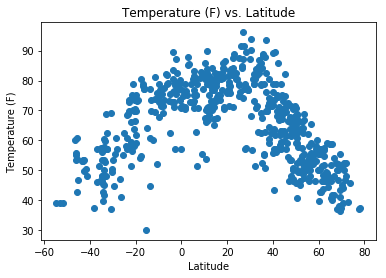

In [7]:
# Plot Temperature (F) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Temperature (F)"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude")
fig1 = plt.gcf()
fig1_path = os.path.join(".","output_charts","Temperature (F) vs Latitude")
fig1.savefig(fig1_path, dpi=1200)

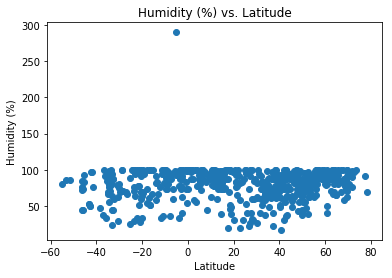

In [8]:
# Plot Humidity (%) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Humidity (%)"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude")
fig2 = plt.gcf()
fig2_path = os.path.join(".","output_charts","Humidity (%) vs Latitude")
fig2.savefig(fig2_path, dpi=1200)

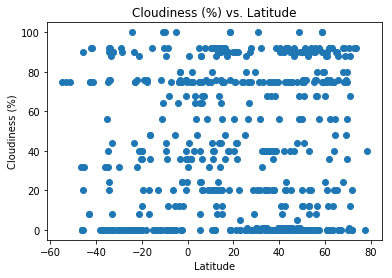

In [9]:
# Plot Cloudiness (%) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Cloudiness (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude")
fig3 = plt.gcf()
fig3_path = os.path.join(".","output_charts","Cloudiness (%) vs Latitude")
fig3.savefig(fig3_path, dpi=1200)

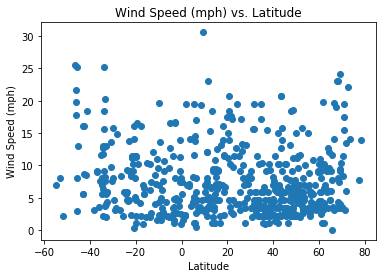

In [10]:
# Plot Wind Speed (mph) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Wind Speed (mph)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude")
fig4 = plt.gcf()
fig4_path = os.path.join(".","output_charts","Wind Speed (mph) vs Latitude")
fig4.savefig(fig4_path, dpi=1200)

# My Analysis

* With the increase of the latitdue from -90 to 90, temperature shows a U curve. Temperature achieves a peak at 0 latitude, which makes sense because the 0 latitude should be the Equator.
* There is no clear relationship between humidity and latitude.
* There is no clear relationship between cloudiness and latitude.
* There is no clear relationship between wind speed and latitude.